# Credit Card Fraud Detection Model

- We are building an AI/ML model that will detect the possibility of a fraudulent transactions made using a credit card given various parameters by the Bank company , So that the customer and the company will be informed and will take actions according to their policies.

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('creditcard.csv')

#### About The Dataset Used

- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

- Getting insights to the dataset 

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking For Missing Values in Dataset

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Hence there are NO NULL VALUES in the dataset .

### Checking for the balance in the dataset

In [8]:
fraud_cases=len(df[df['Class']==1])
non_fraud_cases=len(df[df['Class']==0])

In [9]:
print('Number of Fraud Cases:',fraud_cases)
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Fraud Cases: 492
Number of Non Fraud Cases: 284315


<AxesSubplot: xlabel='Class', ylabel='count'>

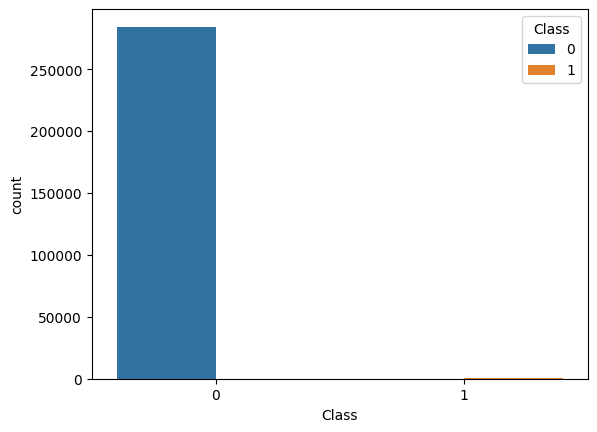

In [10]:
sns.countplot(x=df.Class, hue=df.Class)

- We can see that there is high imbalance in the dataset, there are only 492 positive against 284315 negative values.  
- So we will do oversampling or under sampling or rather we could use the model which do not get affected by the imbalnce in the dataset i.e Ensembling techniques.

In [11]:
fraud=df[df['Class']==1]
genuine=df[df['Class']==0]

<AxesSubplot: xlabel='Time', ylabel='Density'>

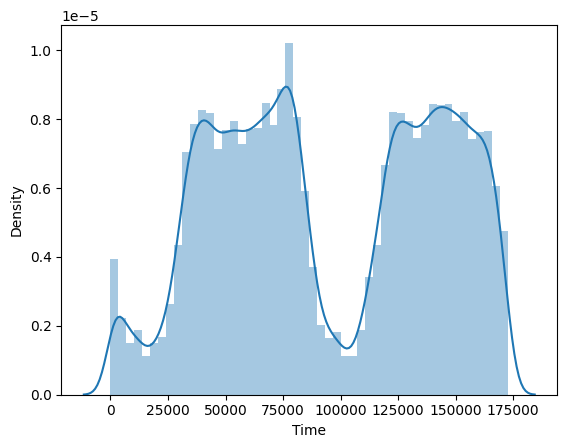

In [12]:
sns.distplot(df['Time'])

This graph shows the times at which transactions were done within  two  days.  It  can  be  seen  that  the  least  number  of transactions were made during night time and highest during the days.

<AxesSubplot: xlabel='Amount', ylabel='Density'>

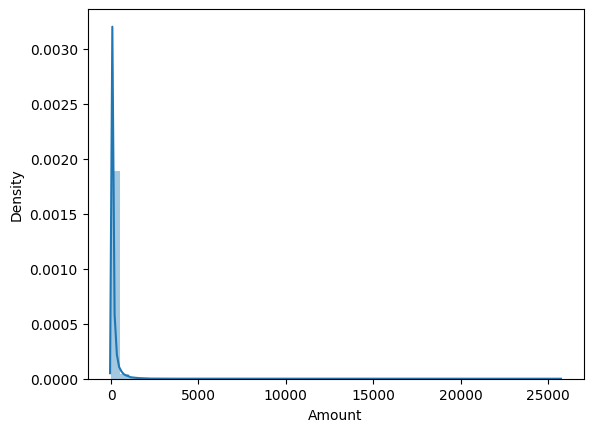

In [13]:
sns.distplot(df['Amount'])

 This graph shows that the number of fraudulent transactions is much lower than the legitimate ones.  This graph shows the times at which transactions were done within  two  days.  It  can  be  seen  that  the  least  number  of transactions were made during night time and highest during the days.   This  graph  represents  the  amount  that  was  transacted.  A majority of transactions are relatively small and only a handful of them come close to the maximum transacted amount.

## Relation between target variables and columns :


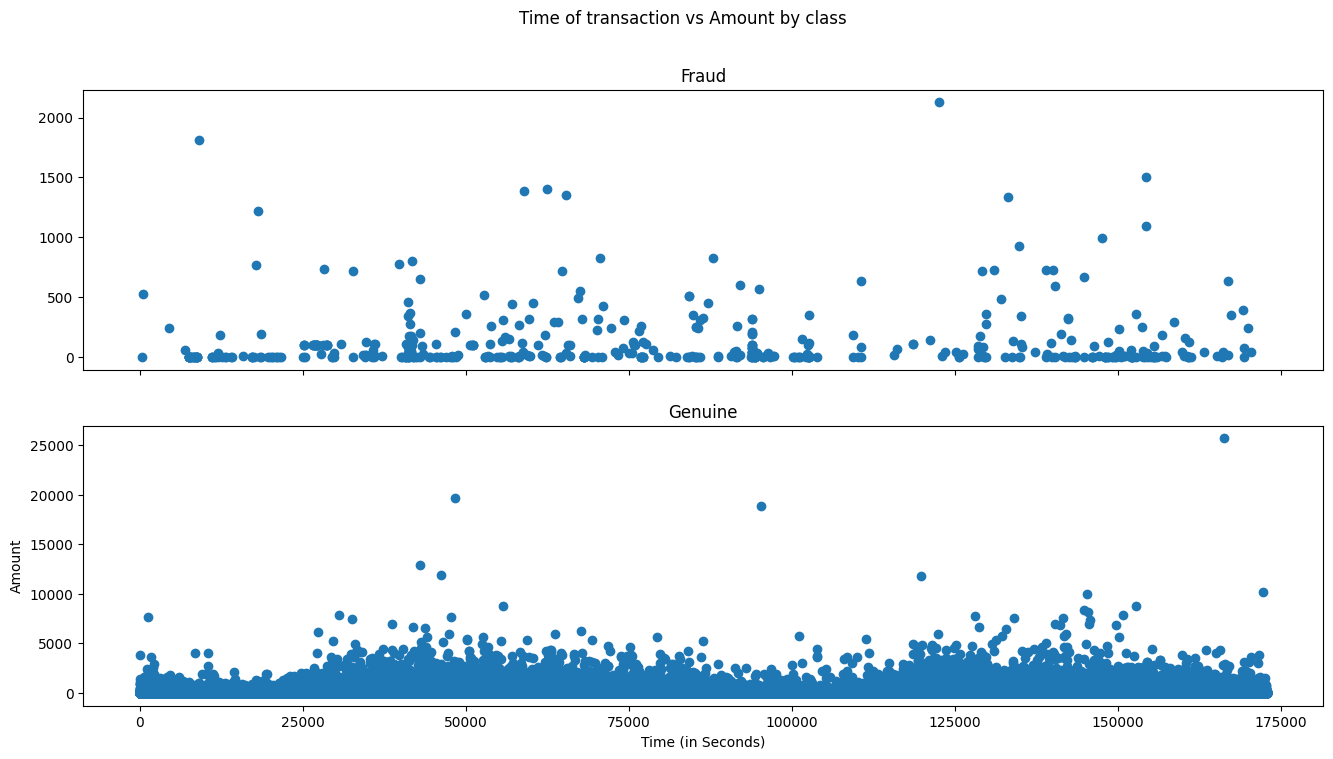

In [14]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### Checking for the correlation in the dataset to see if any two feature are correlated to one another.

<AxesSubplot: >

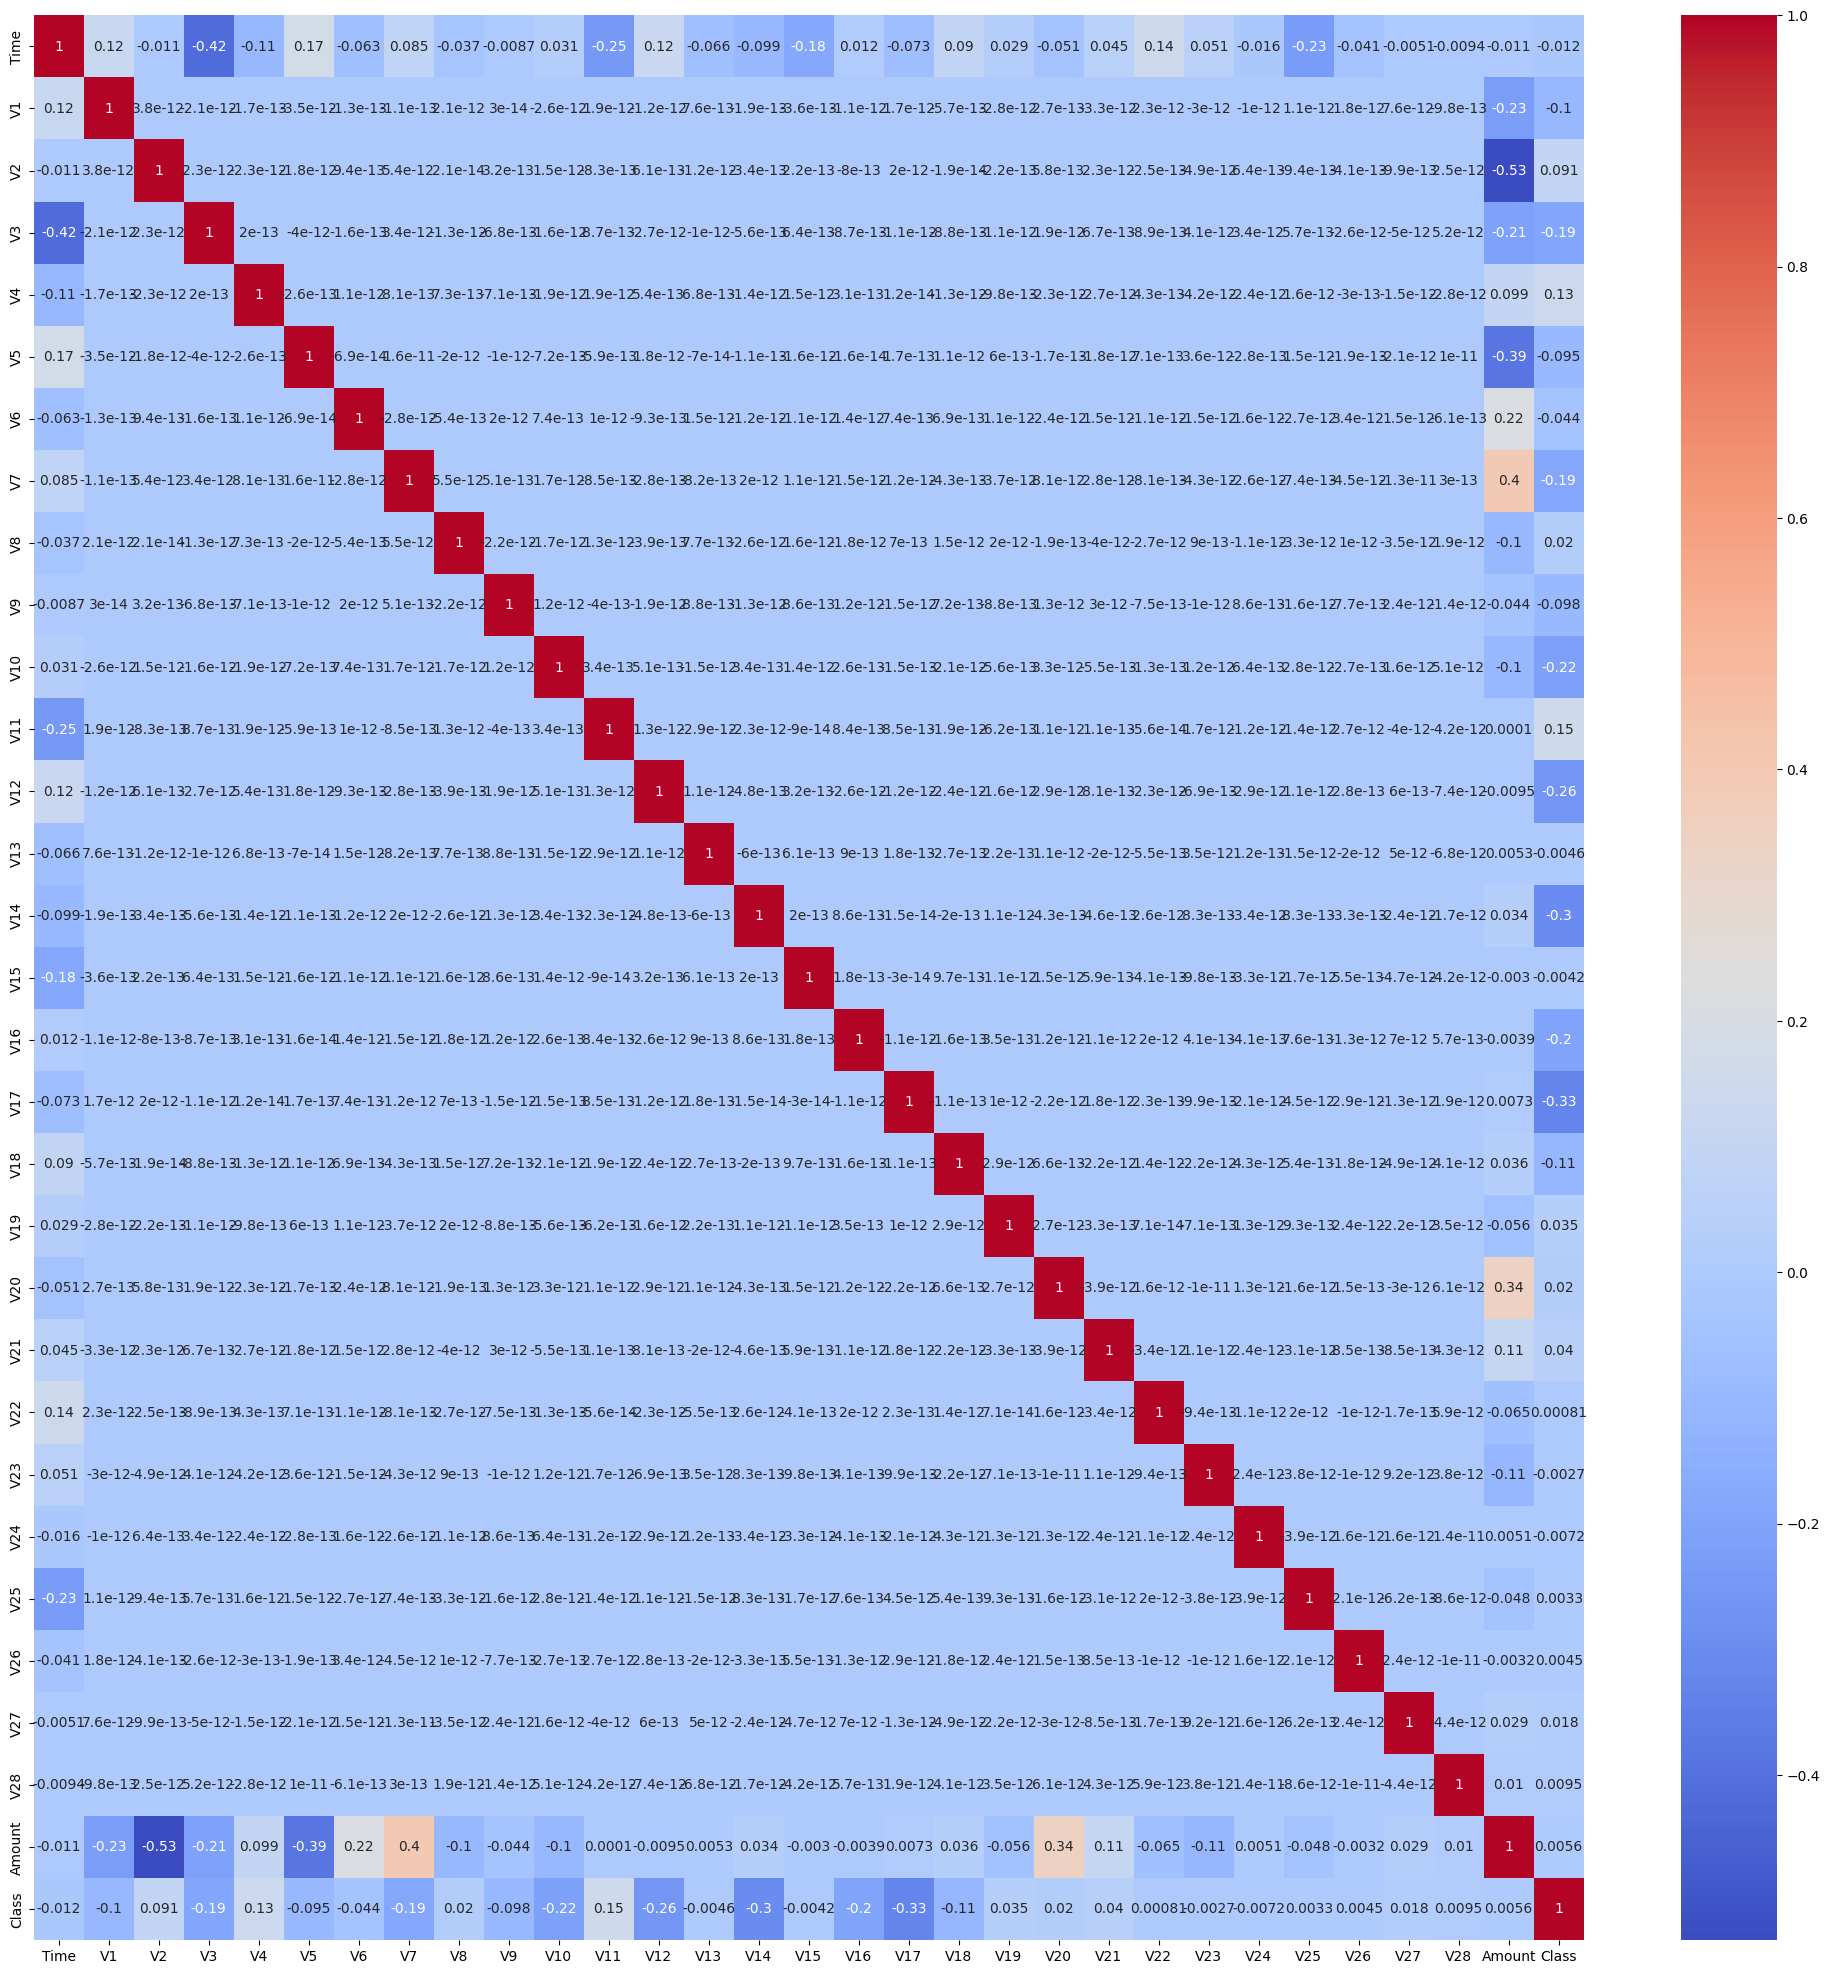

In [15]:
corr=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='coolwarm')

- Since we can see that there are no pair of feature which have high correlation so we are not going to remove any.

#### Making the X and y variable

In [16]:
X=df.drop(columns=['Class'],axis=1)
y=df['Class']

### Scaling the Data to balance the impact of every feature in our model.

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scalar=sc.fit_transform(X)

### Splitting Data for Cross Validation 

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=42,stratify=y)

In [19]:
#importing important functions 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score


### Initializing our model (Random Forest Classifier)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

## Training our Model and Making Prediction .

In [21]:

#training
model.fit(x_train,y_train)
#testing
y_pred=model.predict(x_test)
#scores
accuracy=accuracy_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
recall_score=recall_score(y_test,y_pred)
precision_score=precision_score(y_test,y_pred)

fpr, tpr, threshold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)

In [22]:
auc

0.8942737709570148

## Plotting ROC Curve

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

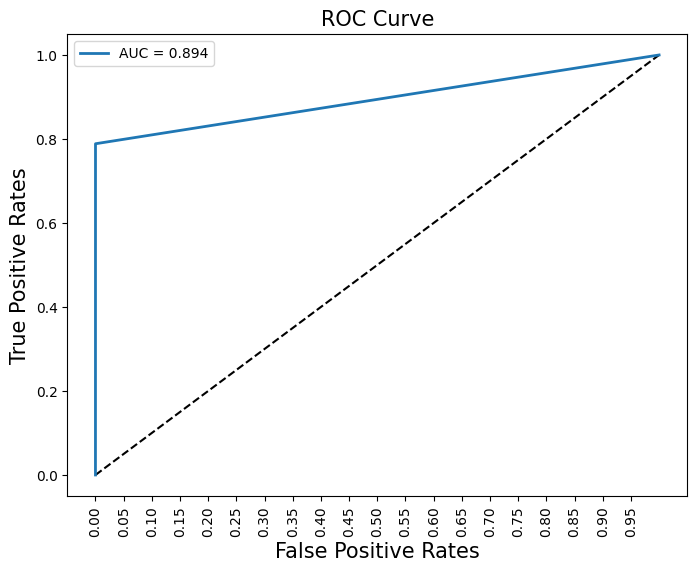

In [24]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % auc)

In [26]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,97,26
is Normal,5,71074


<AxesSubplot: >

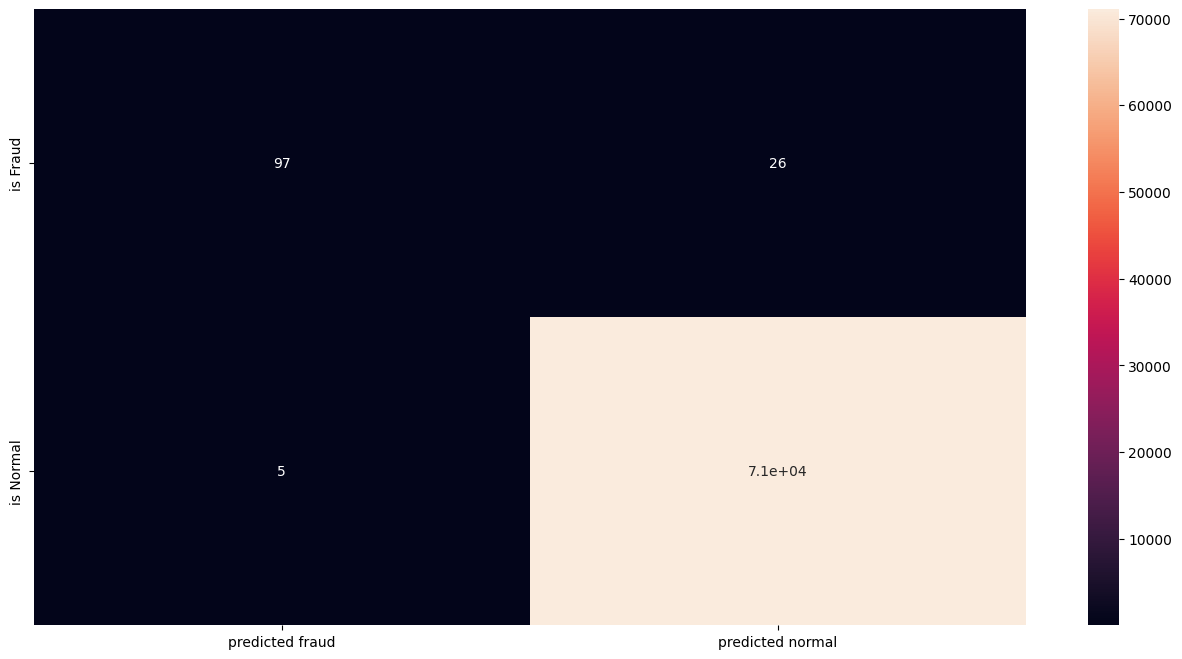

In [27]:
sns.heatmap(confusion, annot=True)

## F1 Score ,Precision and Recall

In [28]:
print('f1_score: ',f1_score)
print('Accuracy: ',accuracy)
print('Recall_score: ',recall_score)
print('Precision_score: ',precision_score)
print(classification_report(y_test,y_pred))

f1_score:  0.8622222222222222
Accuracy:  0.9995646189713772
Recall_score:  0.7886178861788617
Precision_score:  0.9509803921568627
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



- Our Model has a accuracy of 99.95 with F1 score of 0.86 and precision and recall as 0.95 and 0.78 repectively.
- With this Score Our model is good enough to be deployed .